In [17]:
import tensorflow as tf

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import keras
import matplotlib.pyplot as plt
import numpy as np

In [19]:
model_path='D:\\class notes\\Neural Network'

In [20]:
from keras.datasets import mnist

In [21]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [38]:
x_train.shape

(60000, 28, 28, 1)

(28, 28)


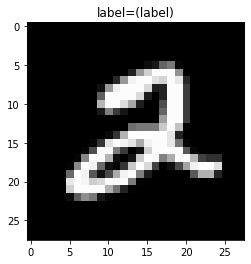

In [22]:
samples=5
pixels=np.array(x_train[samples],dtype='uint8')
print(pixels.shape)
label=y_train[samples]
#plot
plt.title('label=(label)'.format(label=label))
plt.imshow(pixels,cmap='gray')
plt.show()

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
#Sample training 
#x_train.shape[0]--60k  when we use 1 we are considering every image as a single dimension image.
#28,28--28*28 matrix when we feed into the network --it will start iterating


In [27]:
#print(x_train[0].shape)
print(x_train[0])
#Tranformed value--Every element has considered becomes independent and becomes a single dimension

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [28]:
#Normalizing the data
x_train=tf.keras.utils.normalize(x_train,axis=1)  #Scales data btw 0 and 1
x_test=tf.keras.utils.normalize(x_test,axis=1)#Scales data btw 0 and 1

In [29]:
y_train=keras.utils.to_categorical(y_train,10)
#10-10 classes(0-9)
y_test=keras.utils.to_categorical(y_test,10)

In [31]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

#Sequential--keep all the samples what is common and what is uncommon--It will create a common sequesnce not our sequesnce
#Measures it and takes what fits it--Which has the maximum probability it uses it

#add-Adding layer
#For text we use 1d,image is 2d  so using 2d in this
#Conv2D--Convolute the image into 32 pixels,
#Kernel_size-In order to transform the image go by 3*3 matrix which is having take that if not leave it
#Activation--relu--normalized the value before fitting (0-56) becomes(0-1)
#input_shape---Only one time it is mentioned
#Conv2d--(function)--Maximizing it to 64
#Maxpool--(function)--takes higher density--does sampling

#Dropout--Handle the overfitting --does ranking based on the value--
#cut down last 25 percent--we will end up with 75 percent

#Flatten--converting  a matrix to a single dimensional array
#Dense--How many different layers are there..Dense is having relationship with convolution

#Because of the variation To interpret digit recognition 
#Layer--Convolutional Layer
#Tensorflow creates matrix in the convolution..
#ALways it should be multiplicative i.e (32*2,64*2,128)
#Activation --Softmax--thw result will be on classification(probability)

In [33]:
model.compile(optimizer='Adadelta',#"Good default optimizer to start with"
             loss='categorical_crossentropy',#how will we calculate our error"Neural Network"
             metrics=['accuracy'])#what to track

In [34]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 142s 75ms/step - loss: 2.2926 - accuracy: 0.1663
Epoch 2/10
1875/1875 [==============================] - 144s 77ms/step - loss: 2.2439 - accuracy: 0.3504
Epoch 3/10
1875/1875 [==============================] - 130s 70ms/step - loss: 2.1385 - accuracy: 0.4938
Epoch 4/10
1875/1875 [==============================] - 125s 66ms/step - loss: 1.9208 - accuracy: 0.5693
Epoch 5/10
1875/1875 [==============================] - 128s 68ms/step - loss: 1.5752 - accuracy: 0.6267
Epoch 6/10
1875/1875 [==============================] - 126s 67ms/step - loss: 1.2586 - accuracy: 0.6655s - loss: 1.2588 - accura
Epoch 7/10
1875/1875 [==============================] - 125s 66ms/step - loss: 1.0554 - accuracy: 0.6955
Epoch 8/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.9339 - accuracy: 0.7197
Epoch 9/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.8420 - accuracy: 0.7455
Epoch 10/10
1875/1875 [=======

In [ ]:
#Epoch=iteration (Both backward and forward propagation)

In [39]:
val_loss,val_acc=model.evaluate(x_test,y_test)#Evaluate the out of sample with
print(val_loss)#Model's loss error
print(val_loss)#model's accuracy

313/313 [==============================] - 5s 15ms/step - loss: 0.5641 - accuracy: 0.8486
0.5640914440155029
0.5640914440155029


In [40]:
model.save(model_path)

INFO:tensorflow:Assets written to: D:\class notes\Neural Network\assets
